# Zillow Prize Kaggle Competition
Zillow is a popular online real estate and rental marketplace dedicated to providing customers with data to make the best possible housing decision. In the “Zillow Prize” Kaggle competition, Zillow released data (3 million observations) with the hope that competitors could use it to help improve the accuracy of the Zestimate, their house pricing algorithm. “Zestimates” are estimated home values based on 7.5 million statistical and machine learning models that analyze hundreds of data points on each property. Our objective was more complex and indirect than simply predicting housing prices from given data. 

The dataset consists of information about 2.9 million properties and is grouped into 2 files:
properties_2017.csv (all the properties with their home features for 2017))
train_2017.csv (the training set with transactions from 1/1/2017 to 9/15/2017)

In [1]:
import pandas as pd
import numpy as np
from scipy.stats.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

sampleSub = pd.read_csv('sample_submission.csv')
train = pd.read_csv('train_2017.csv')
properties = pd.read_csv('properties_2017.csv')
train.head()

C:\Users\dexter\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,parcelid,logerror,transactiondate
0,14297519,0.025595,2017-01-01
1,17052889,0.055619,2017-01-01
2,14186244,0.005383,2017-01-01
3,12177905,-0.103410,2017-01-01
4,10887214,0.006940,2017-01-01


In [2]:
properties.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,5.0,NaN,NaN,NaN,...,1.0,NaN,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,6.0,NaN,NaN,...,1.0,NaN,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,1.0,NaN,196751.0,440101.0,2016.0,243350.0,5725.17,NaN,NaN,NaN


In [3]:
# Now lets merge properties.csv and train.csv as they contain different number of rows.
train = pd.merge(train, properties, on='parcelid', how='left')
train.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,14297519,0.025595,2017-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,485713.0,1023282.0,2016.0,537569.0,11013.72,NaN,NaN,6.059063e+13
1,17052889,0.055619,2017-01-01,NaN,NaN,NaN,1.0,2.0,NaN,NaN,...,1.0,NaN,88000.0,464000.0,2016.0,376000.0,5672.48,NaN,NaN,6.111001e+13
2,14186244,0.005383,2017-01-01,NaN,NaN,NaN,2.0,3.0,NaN,NaN,...,1.0,NaN,85289.0,564778.0,2016.0,479489.0,6488.30,NaN,NaN,6.059022e+13
3,12177905,-0.103410,2017-01-01,NaN,NaN,NaN,3.0,4.0,NaN,8.0,...,NaN,NaN,108918.0,145143.0,2016.0,36225.0,1777.51,NaN,NaN,6.037300e+13
4,10887214,0.006940,2017-01-01,1.0,NaN,NaN,3.0,3.0,NaN,8.0,...,NaN,NaN,73681.0,119407.0,2016.0,45726.0,1533.89,NaN,NaN,6.037124e+13


# Explore missing values in merged train dataset.
Each property has 58 features. Around 50% of the features have missing values. Some features have 97% missing values.

C:\Users\dexter\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()


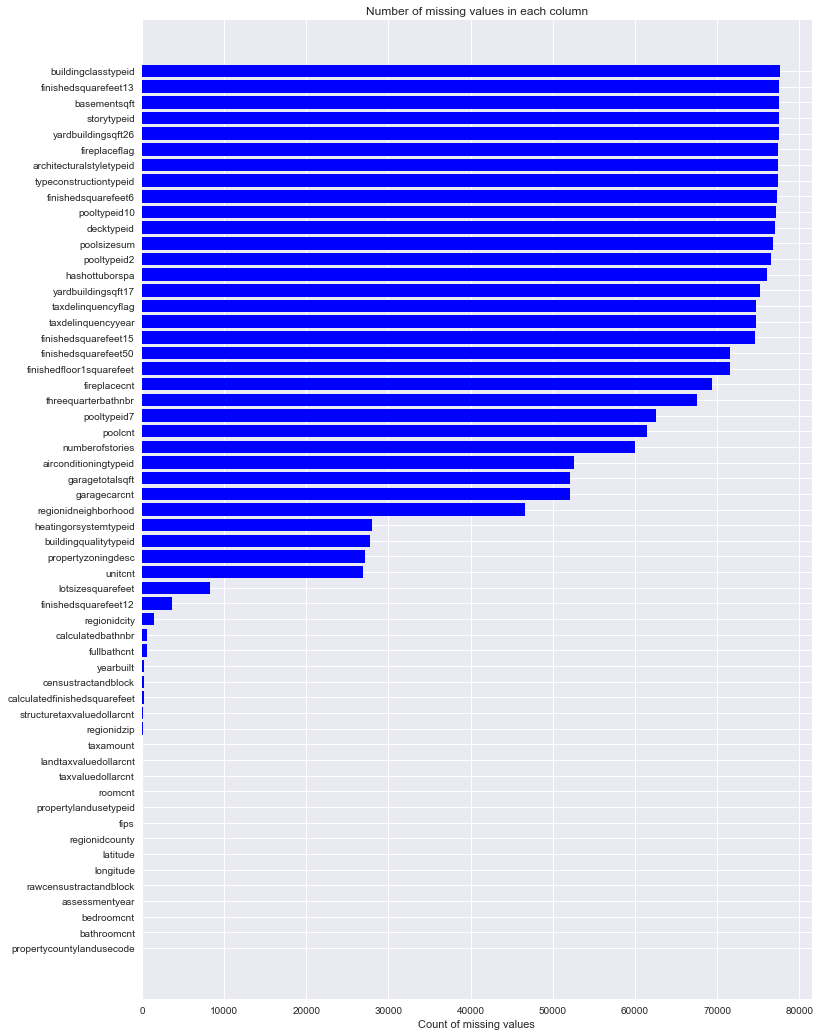

In [4]:
missing_df = train.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.ix[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df.head()

ind = np.arange(missing_df.shape[0])
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

# Correlation of columns with logerror
finishedsquarefeet15, garagetotalsqft, bathroomcnt, fullbathcnt are some of the highly correlated values  with logerror. These properties effect most while calculating zestimate. Higher the price of house, greater is the garagetotalsqft. Similarly for other properties.

In [5]:
# Fill missing values with mean
mean_values = train.mean(axis=0)
train_new = train.fillna(mean_values, inplace=True)

# Calculate correlation coefficient between (all properties and target column logerror).
# Select columns except logerror and which are float64
colNames = [colName for colName in train_new.columns if colName not in ['logerror'] if train_new[colName].dtype=='float64']

# Calculate correlation of colNames with logerror
corrValues = []
for col in colNames:
    corrValues.append(np.corrcoef(train_new[col].values, train_new['logerror'].values)[0,1]) # np.corref returns correlation matrix
corrDF = pd.DataFrame({'colNames':colNames, 'corrValues':corrValues})
corrDF = corrDF.sort_values(by='corrValues')
print(corrDF)

C:\Users\dexter\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3003: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\dexter\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3004: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


                        colNames  corrValues
50            taxdelinquencyyear   -0.019361
33                regionidcounty   -0.016475
22                      latitude   -0.011713
13          finishedsquarefeet15   -0.010099
6          buildingqualitytypeid   -0.009819
41            yardbuildingsqft17   -0.006233
30         propertylandusetypeid   -0.005673
21         heatingorsystemtypeid   -0.004570
14          finishedsquarefeet50   -0.004505
34          regionidneighborhood   -0.004065
9       finishedfloor1squarefeet   -0.003177
12          finishedsquarefeet13   -0.003011
35                   regionidzip   -0.001292
42            yardbuildingsqft26   -0.000691
1       architecturalstyletypeid   -0.000337
39        typeconstructiontypeid   -0.000030
48         landtaxvaluedollarcnt    0.000500
32                  regionidcity    0.001063
26                   poolsizesum    0.001117
40                       unitcnt    0.001555
49                     taxamount    0.002197
46        

In [6]:
corrDF_sel = corrDF.ix[(corrDF['corrValues']>0.02) | (corrDF['corrValues']<-0.01)]
print(corrDF_sel)

                        colNames  corrValues
50            taxdelinquencyyear   -0.019361
33                regionidcounty   -0.016475
22                      latitude   -0.011713
13          finishedsquarefeet15   -0.010099
20               garagetotalsqft    0.020888
3                    bathroomcnt    0.025788
18                   fullbathcnt    0.026632
7              calculatedbathnbr    0.028789
4                     bedroomcnt    0.031603
10  calculatedfinishedsquarefeet    0.040233
11          finishedsquarefeet12    0.043625


C:\Users\dexter\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


# Heatmap of important features.

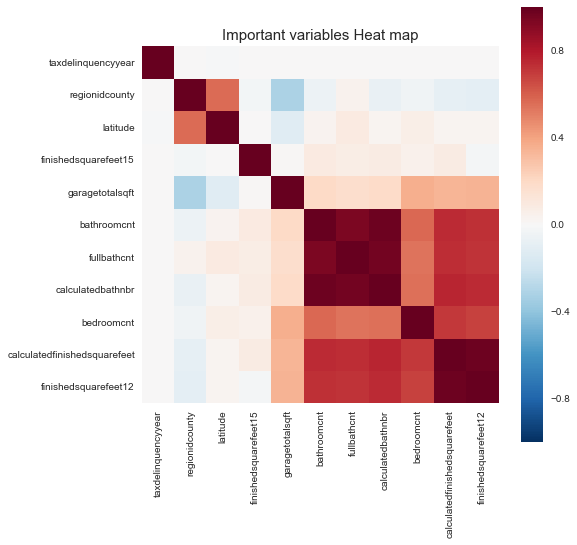

In [7]:
corrDF_sel_cols = corrDF_sel['colNames'].tolist()
tmpDF = train[corrDF_sel_cols]
corrMat = tmpDF.corr(method='spearman')
f, ax = plt.subplots(figsize=(8, 8))

# Draw the heatmap using seaborn
sns.heatmap(corrMat, vmax=1., square=True)
plt.title("Important variables Heat map", fontsize=15)
plt.show()

# Correlation graph of the important features after removing redundant features.
Seems the range of logerror narrows down with increase in finished square feet 12 variable. Probably larger houses are easy to predict.

C:\Users\dexter\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\dexter\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


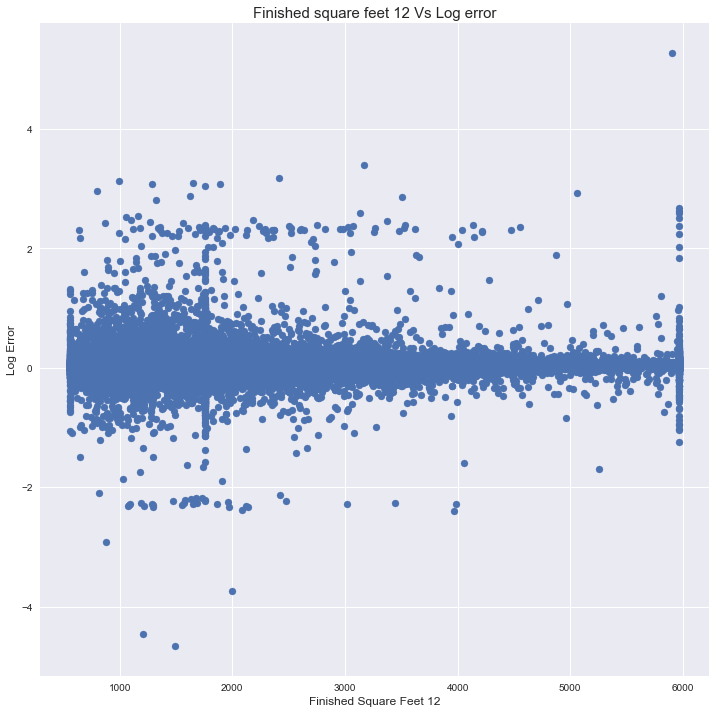

In [8]:
# Finished SquareFeet 12

color = sns.color_palette()
col = "finishedsquarefeet12"
ulimit = np.percentile(train[col].values, 99.5)
llimit = np.percentile(train[col].values, 0.5)
train[col].ix[train[col]>ulimit] = ulimit
train[col].ix[train[col]<llimit] = llimit

plt.figure(figsize=(12,12))
#sns.jointplot(x=train.finishedsquarefeet12.values, y=train.logerror.values, size=10, color=color[4])
plt.scatter(x=train.finishedsquarefeet12.values, y=train.logerror.values,)
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('Finished Square Feet 12', fontsize=12)
plt.title("Finished square feet 12 Vs Log error", fontsize=15)
plt.show()

# Distribution of transaction dates
* As shown in the figure above, there are only some of the transactions after 25.10 in the train set, 
* because the rest is in the test set (for the public LB).

[('2017-01', 7025), ('2017-02', 6412), ('2017-03', 9327), ('2017-04', 8679), ('2017-05', 10487), ('2017-06', 11456), ('2017-07', 9490), ('2017-08', 9936), ('2017-09', 4801)]


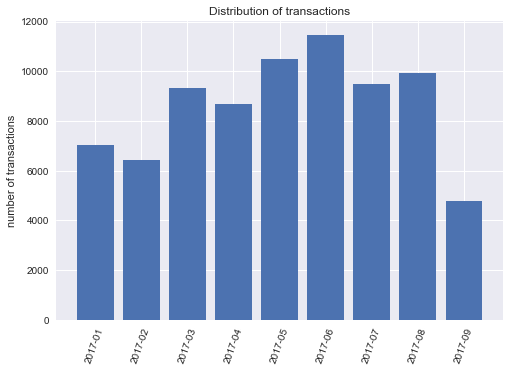

In [9]:
transactiondate = train['transactiondate']

#from datetime import datetime
#transactiondate = [datetime.strptime(date, '%Y-%m-%d') for date in transactiondate]
#print(transactiondate[0].month)

from itertools import groupby
freq = [(k, len(list(group))) for k, group in groupby(sorted(transactiondate), 
                                                                 key=lambda x: (x.split('-')[0]+'-'+x.split('-')[1]))]

print(freq)
plt.bar(range(len(freq)), [val[1] for val in freq], align='center')
plt.xticks(range(len(freq)), [val[0] for val in freq])
plt.xticks(rotation=70)
plt.ylabel('number of transactions')
plt.title('Distribution of transactions')
plt.show()

# When were the houses built?
* Let’s plot the distribution of build year for the houses. 
* Most houses were built around 1950. There are not many older houses, neither many new houses >2000.

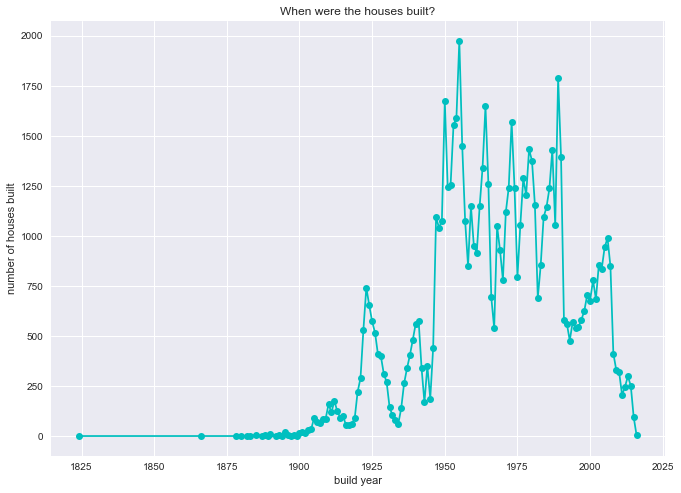

In [10]:
buildYear = train['yearbuilt']
buildYear = [int(x) for x in buildYear]
yFreq = [(k,len(list(group))) for k, group in groupby(sorted(buildYear))]

fig = plt.figure(figsize=(11,8))
ax1 = fig.add_subplot(111)
ax1.plot([val[0] for val in yFreq], [val[1] for val in yFreq], label='build year', color='c', marker='o')

plt.xlabel('build year')
plt.ylabel('number of houses built')
plt.title('When were the houses built?')
plt.show()

# Bathroom count
2.279 value in the mean value of bathroom count.

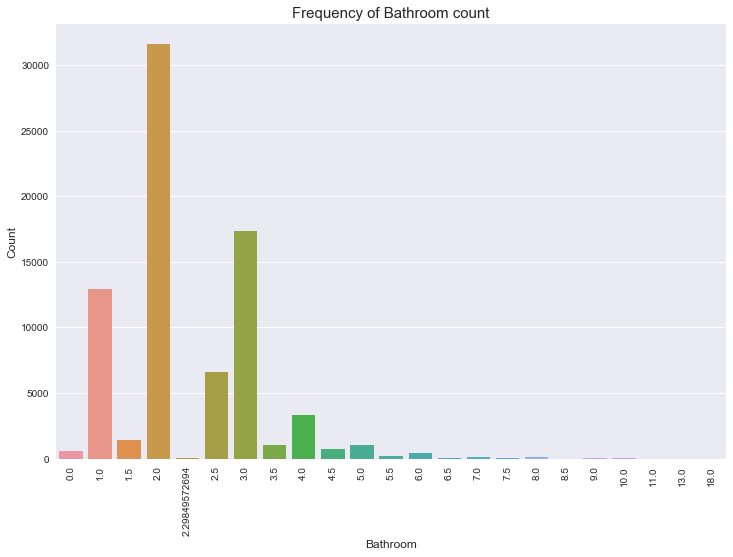

In [11]:
plt.figure(figsize=(12,8))
sns.countplot(x="bathroomcnt", data=train)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Bathroom', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Bathroom count", fontsize=15)
plt.show()

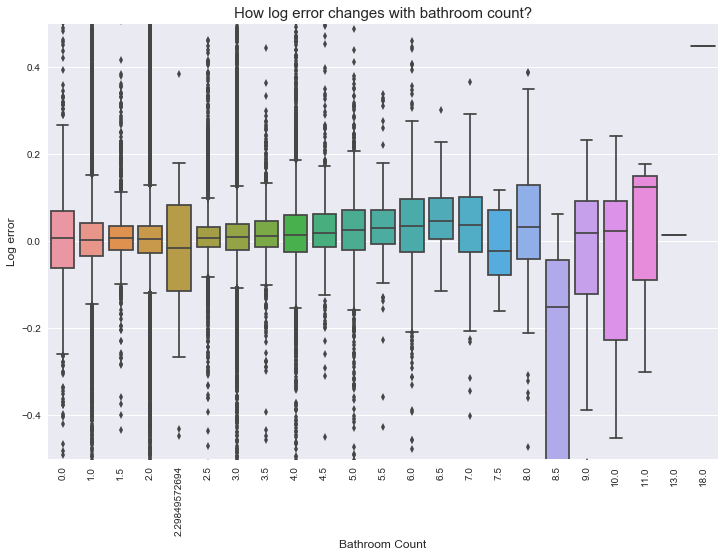

In [12]:
plt.figure(figsize=(12,8))
sns.boxplot(x="bathroomcnt", y="logerror", data=train)
plt.ylabel('Log error', fontsize=12)
plt.xlabel('Bathroom Count', fontsize=12)
plt.xticks(rotation='vertical')
plt.ylim(-0.5,0.5)
plt.title("How log error changes with bathroom count?", fontsize=15)
plt.show()

# Bedroom count
3.053 is the mean value of bedroom count.

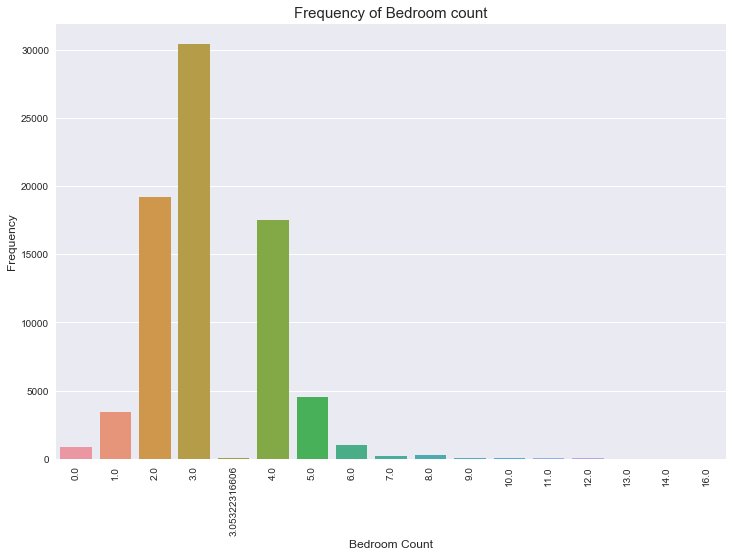

In [13]:
plt.figure(figsize=(12,8))
sns.countplot(x="bedroomcnt", data=train)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Bedroom Count', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Bedroom count", fontsize=15)
plt.show()

C:\Users\dexter\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
C:\Users\dexter\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


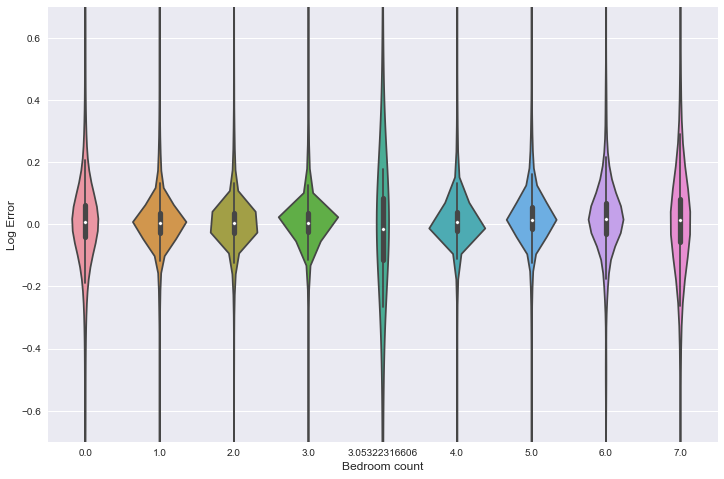

In [14]:
train['bedroomcnt'].ix[train['bedroomcnt']>7] = 7
plt.figure(figsize=(12,8))
sns.violinplot(x='bedroomcnt', y='logerror', data=train)
plt.xlabel('Bedroom count', fontsize=12)
plt.ylabel('Log Error', fontsize=12)
plt.ylim(-0.7,0.7)
plt.show()